In [17]:
import matplotlib.pyplot as plt 
from scipy.fft import fft, ifft
import numpy as np

## Пример правильного отображения спектра сигнала

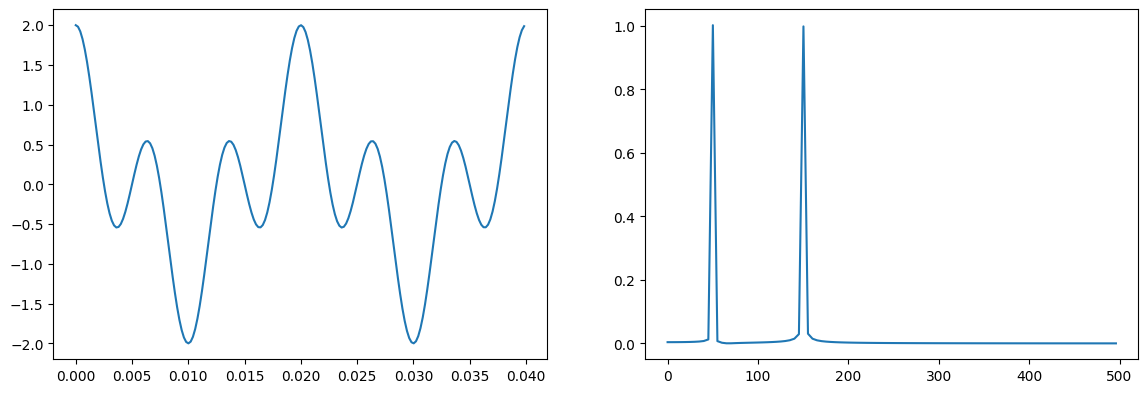

In [18]:
N = 1000
f1 = 50
f2 = 150
fmax= 500

T = 1/fmax
x = np.linspace(0, N*T/10, N)
y = np.cos(2*np.pi*f1*x)+np.cos(2*np.pi*f2*x)
plt.figure(figsize=(14,10))
plt.subplot(221)
plt.plot(x[:N//5], y[:N//5])

xf = np.linspace(0, 10*fmax/2, N//2)
yf = fft(y)
plt.subplot(222)
plt.plot(xf[:N//10], 2/N*abs(yf[:N//10]))

plt.show()


## Первое задание

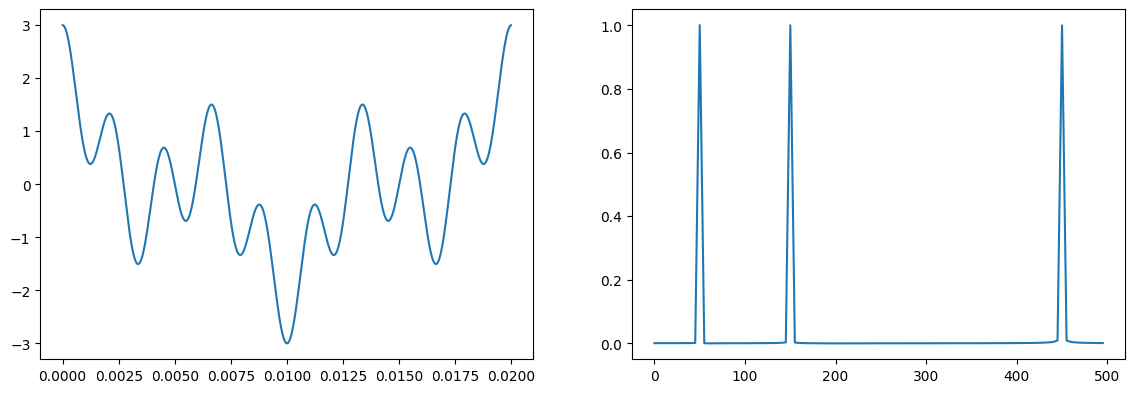

In [19]:
N = 10000
fmax = 500
T = 1/fmax
x = np.linspace(0, N*T/100, N)
cos50 = np.cos(2*np.pi*50*x)
cos150 = np.cos(2*np.pi*150*x)
cos450 = np.cos(2*np.pi*450*x)
y = cos50 + cos150 + cos450
plt.figure(figsize=(14,10))
plt.subplot(221)
plt.plot(x[:N//10], y[:N//10])
xf = np.linspace(0, 100*fmax, N)
yf = fft(y)
plt.subplot(222)
plt.plot(xf[:N//100], 2/N*abs(yf[:N//100]))
plt.show()

## Второе задание

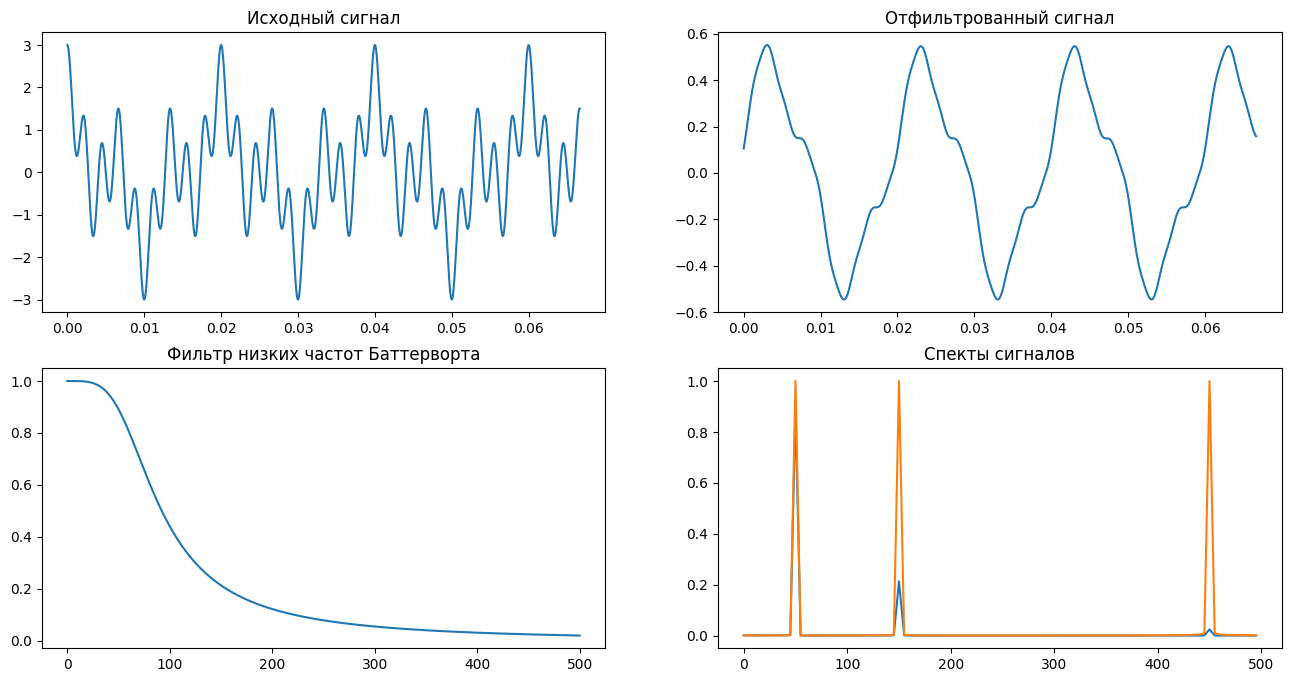

In [20]:
def Hl(w, wc):
    return wc**2/(-w**2 + (1j)*np.sqrt(2)*w*wc + wc**2)

xh = np.linspace(0, 500, N)
yh = abs(Hl(xh, 70))
yf2 = yf*Hl(xf, 70)
y2 = ifft(yf2)
fig, axs = plt.subplots(2, 2, figsize=(16, 8))
axs[0,0].set_title('Исходный сигнал')
axs[0,0].plot(x[:N//3], y[:N//3])
axs[0,1].set_title('Отфильтрованный сигнал')
axs[0,1].plot(x[:N//3], y2[:N//3])
axs[1,0].set_title('Фильтр низких частот Баттерворта')
axs[1,0].plot(xh, yh)
axs[1,1].set_title('Спекты сигналов')
axs[1,1].plot(xf[:N//100], 2/N*abs(yf2[:N//100]))
axs[1,1].plot(xf[:N//100], 2/N*abs(yf[:N//100]))
plt.show()

## Третье задание

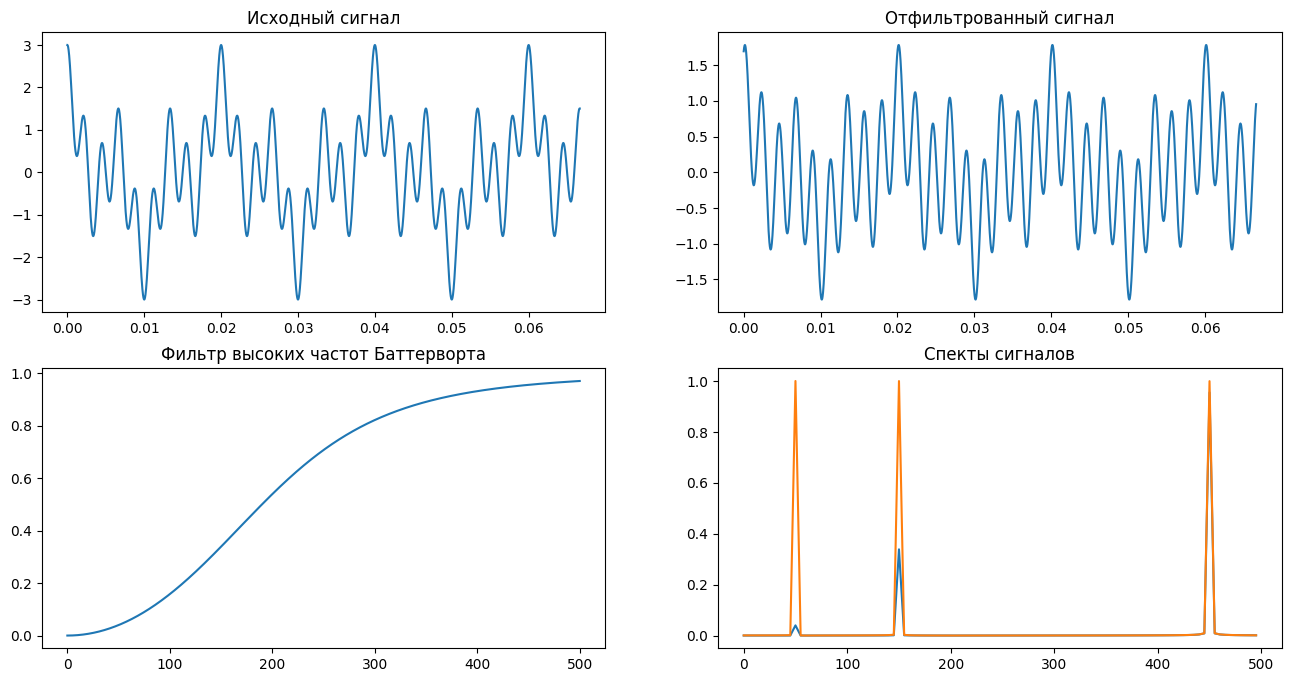

In [21]:
def Hh(w, wc):
    return w**2/(-wc**2 + (1j)*np.sqrt(2)*w*wc + w**2)

xh = np.linspace(0, 500, N)
yh = abs(Hh(xh, 250))
yf2 = yf*Hh(xf, 250)
y2 = ifft(yf2)
fig, axs = plt.subplots(2, 2, figsize=(16, 8))
axs[0,0].set_title('Исходный сигнал')
axs[0,0].plot(x[:N//3], y[:N//3])
axs[0,1].set_title('Отфильтрованный сигнал')
axs[0,1].plot(x[:N//3], y2[:N//3])
axs[1,0].set_title('Фильтр высоких частот Баттерворта')
axs[1,0].plot(xh, yh)
axs[1,1].set_title('Спекты сигналов')
axs[1,1].plot(xf[:N//100], 2/N*abs(yf2[:N//100]))
axs[1,1].plot(xf[:N//100], 2/N*abs(yf[:N//100]))
plt.show()

## Четвертое задание

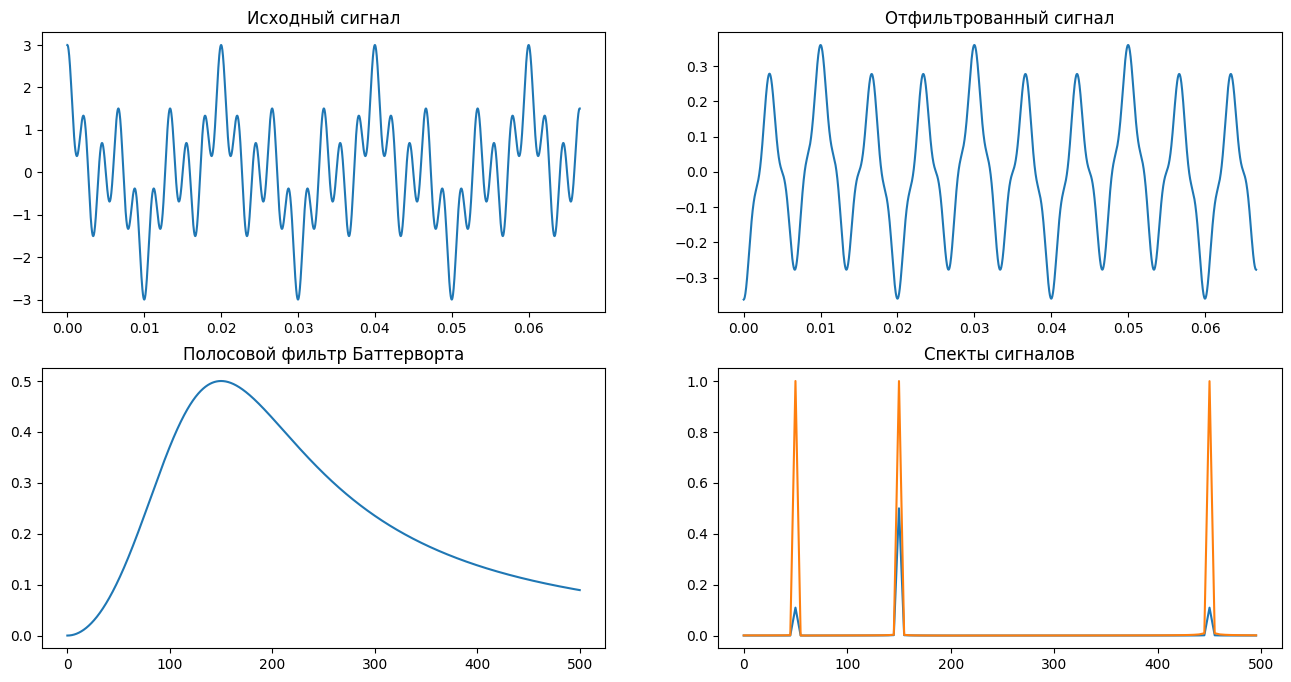

In [22]:
def Hp(w, wc):
    return Hl(w, wc)*Hh(w, wc)

xh = np.linspace(0, 500, N)
yh = abs(Hp(xh, 150))
yf2 = yf*Hp(xf, 150)
y2 = ifft(yf2)
fig, axs = plt.subplots(2, 2, figsize=(16, 8))
axs[0,0].set_title('Исходный сигнал')
axs[0,0].plot(x[:N//3], y[:N//3])
axs[0,1].set_title('Отфильтрованный сигнал')
axs[0,1].plot(x[:N//3], y2[:N//3])
axs[1,0].set_title('Полосовой фильтр Баттерворта')
axs[1,0].plot(xh, yh)
axs[1,1].set_title('Спекты сигналов')
axs[1,1].plot(xf[:N//100], 2/N*abs(yf2[:N//100]))
axs[1,1].plot(xf[:N//100], 2/N*abs(yf[:N//100]))
plt.show()

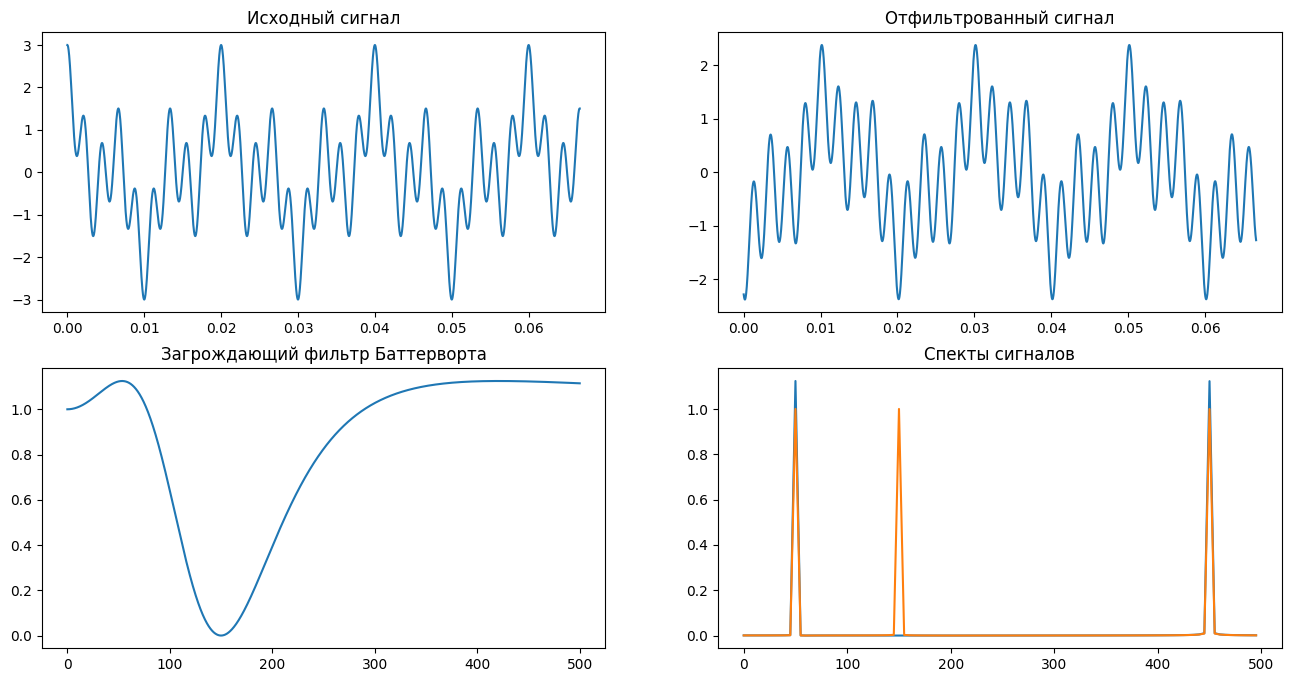

In [23]:
def Hr(w, wc):
    return (Hh(w,wc)-Hl(w,wc))*(Hl(w,wc)-Hh(w,wc))

xh = np.linspace(0, 500, N)
yh = abs(Hr(xh, 150))
yf2 = yf*Hr(xf, 150)
y2 = ifft(yf2)
fig, axs = plt.subplots(2, 2, figsize=(16, 8))
axs[0,0].set_title('Исходный сигнал')
axs[0,0].plot(x[:N//3], y[:N//3])
axs[0,1].set_title('Отфильтрованный сигнал')
axs[0,1].plot(x[:N//3], y2[:N//3])
axs[1,0].set_title('Загрождающий фильтр Баттерворта')
axs[1,0].plot(xh, yh)
axs[1,1].set_title('Спекты сигналов')
axs[1,1].plot(xf[:N//100], 2/N*abs(yf2[:N//100]))
axs[1,1].plot(xf[:N//100], 2/N*abs(yf[:N//100]))
plt.show()

## Пятое задание

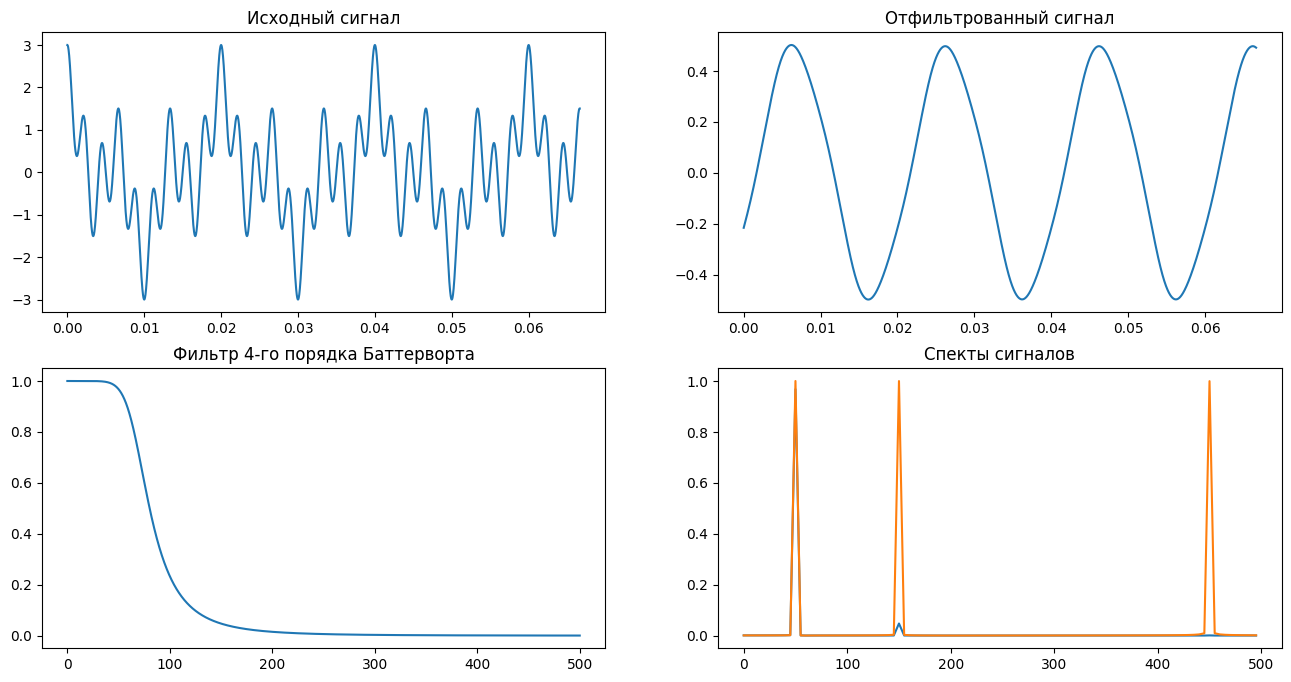

In [24]:
import cmath
def HS(S, num):
    z = -1/(-1)**num
    n = 2*num
    roots = [cmath.rect(pow(abs(z), 1/n), cmath.phase(z)/n + 2*cmath.pi*k/n) for k in range(n)]
    roots = filter(lambda x: True if x.real < 0 else False, roots)
    prod = np.array([S - s for s in roots])
    res = 1
    for i in range(len(prod)):
        res *= prod[i]
    return 1/res

xh = np.linspace(0, 500, N)
yh = np.array([abs(HS(1j*(x/70), 4)) for x in xh])
yf2 = yf*HS(1j*(xf/70), 4)
y2 = ifft(yf2)
fig, axs = plt.subplots(2, 2, figsize=(16, 8))
axs[0,0].set_title('Исходный сигнал')
axs[0,0].plot(x[:N//3], y[:N//3])
axs[0,1].set_title('Отфильтрованный сигнал')
axs[0,1].plot(x[:N//3], y2[:N//3])
axs[1,0].set_title('Фильтр 4-го порядка Баттерворта')
axs[1,0].plot(xh, yh)
axs[1,1].set_title('Спекты сигналов')
axs[1,1].plot(xf[:N//100], 2/N*abs(yf2[:N//100]))
axs[1,1].plot(xf[:N//100], 2/N*abs(yf[:N//100]))
plt.show()


## Шестое задание

c:\Users\honor\pythonTasks\myvenv\Lib\site-packages\matplotlib\cbook\__init__.py:1345: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


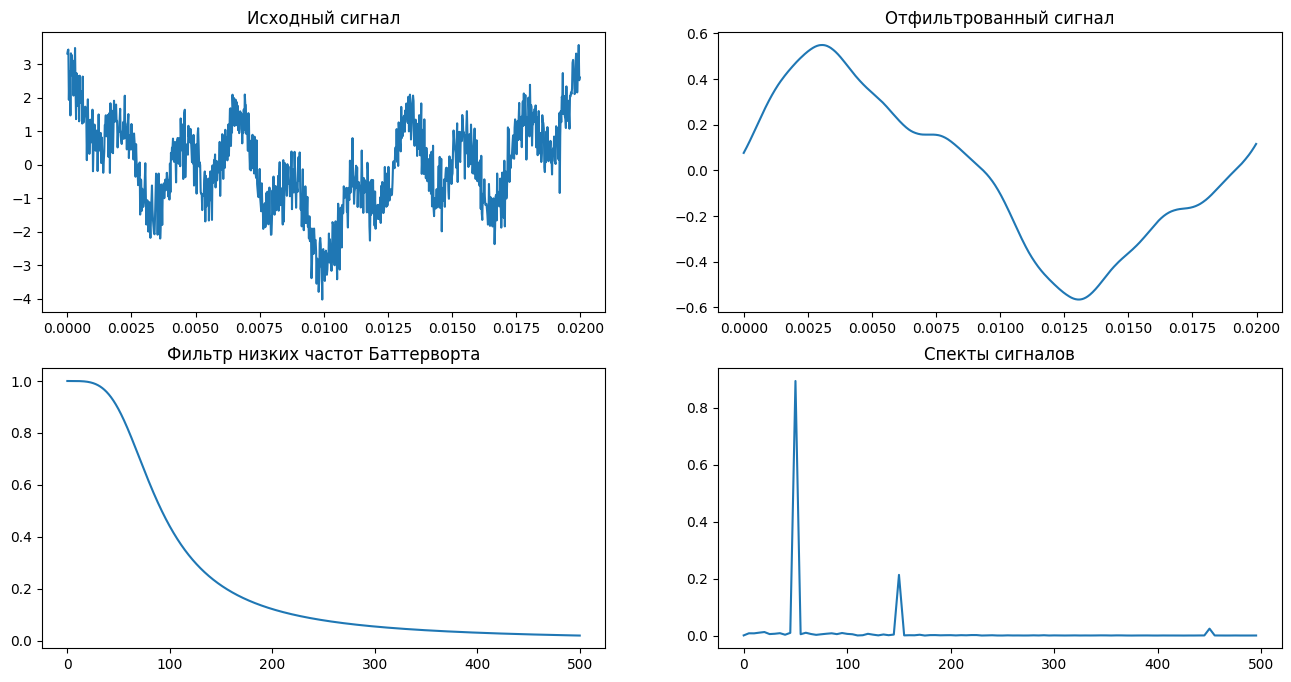

In [26]:
N = 10000
fmax = 500
T = 1/fmax
x = np.linspace(0, N*T/100, N)
cos50 = np.cos(2*np.pi*50*x)
cos150 = np.cos(2*np.pi*150*x)
cos450 = np.cos(2*np.pi*450*x)
y = cos50 + cos150 + cos450

noise = np.random.normal(0, 0.5, len(x))
y2 = y + noise

xf = np.linspace(0, 100*fmax, N)
yf = fft(y2)

xh = np.linspace(0, 500, N)
yh = abs(Hl(xh, 70))
yf2 = yf*Hl(xf, 70)
y3 = ifft(yf2)
fig, axs = plt.subplots(2, 2, figsize=(16, 8))
axs[0,0].set_title('Исходный сигнал')
axs[0,0].plot(x[:N//10], y2[:N//10])
axs[0,1].set_title('Отфильтрованный сигнал')
axs[0,1].plot(x[:N//10], y3[:N//10])
axs[1,0].set_title('Фильтр низких частот Баттерворта')
axs[1,0].plot(xh, yh)
axs[1,1].set_title('Спекты сигналов')
axs[1,1].plot(xf[:N//100], 2/N*abs(yf2[:N//100]))
#axs[1,1].plot(xf[:N//100], 2/N*abs(yf[:N//100]))
plt.show()